# Proyecto SVD

INTEGRANTES:
- Amelie Ramírez
- Kamila Salas
- Diego Olivares

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Rutas

In [3]:
ruta_data = "data\\data.npy"
ruta_info = "data\\info.xlsx"
ruta_test = "data\\test.npy"
ruta_votes = "data\\votes.npy"

## Parte 1:

El objetivo de esta pregunta es construir un identificador de rostros. La
matriz data.npy contiene 72 imagenes de rostros, correspondientes a 12 mujeres.
Puede cargar la matriz y mostrar las imagenes usando el siguiente c ́odigo:

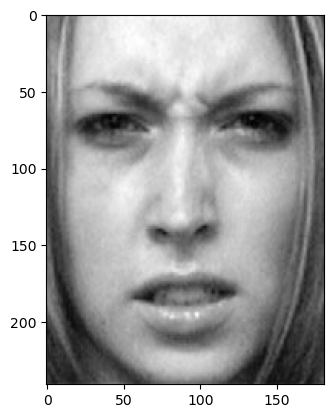

In [4]:
# Cargar matriz
A = np.load(ruta_data)
# Mostrar la i-esima imagen

i = 0 # Cambiar si se quiere mostrar otra imagen
imagen = A[i].reshape((241, 181))
plt.imshow(imagen, cmap="gray")
plt.show()

Las filas est´an ordenadas de manera que las im´agenes correspondientes a
la primera persona est´an en las filas 1 a 6, las correspondientes a la segunda
persona en las filas 7 a 12, y as´ı.

### 1.1

Realice la SVD de la matriz A, y ´usela para proyectar las imagenes sobre
el espacio lineal de dimensi´on k que mejor las aproxima. Use valores de
k = 1, 5, 10, 25, 50 y 72. Elija un par de rostros, y para cada valor de k,
muestre los “rostros aproximados”(correspondientes a las proyecciones) y
comp´arelos con los originales.

In [5]:
def truncated_svd(A, k):
    U, S, Vh = np.linalg.svd(A, full_matrices=False)
    return U[:, :k], S[:k], Vh[:k]

In [6]:
U_1, S_1, Vh_1 = truncated_svd(A, 1)
U_5, S_5, Vh_5 = truncated_svd(A, 5)
U_10, S_10, Vh_10 = truncated_svd(A, 10)
U_25, S_25, Vh_25 = truncated_svd(A, 25)
U_50, S_50, Vh_50 = truncated_svd(A, 50)
U_72, S_72, Vh_72 = truncated_svd(A, 72)

In [7]:
SVD_1 = U_1 @ np.diag(S_1) @ Vh_1
SVD_5 = U_5 @ np.diag(S_5) @ Vh_5
SVD_10 = U_10 @ np.diag(S_10) @ Vh_10
SVD_25 = U_25 @ np.diag(S_25) @ Vh_25
SVD_50 = U_50 @ np.diag(S_50) @ Vh_50
SVD_72 = U_72 @ np.diag(S_72) @ Vh_72

lista_SVD = [SVD_1, SVD_5, SVD_10, SVD_25, SVD_50, SVD_72]

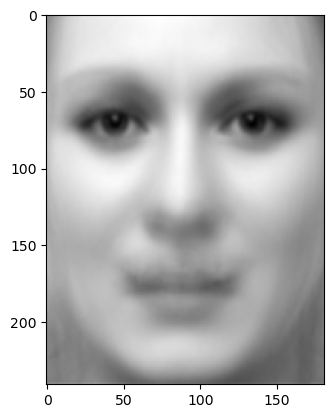

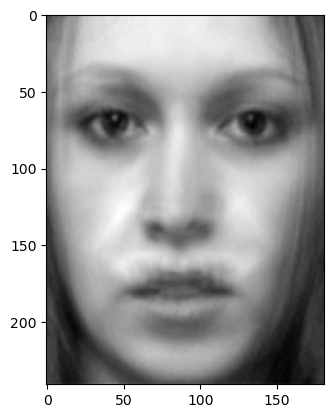

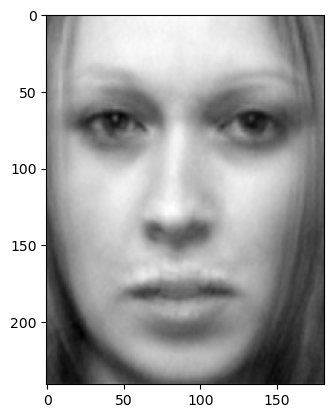

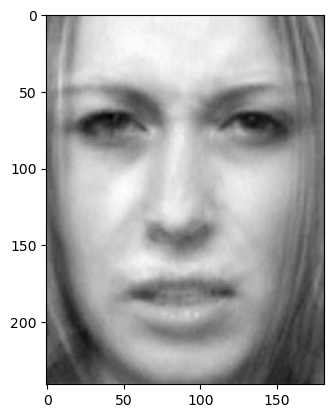

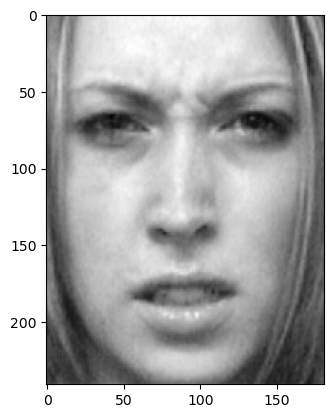

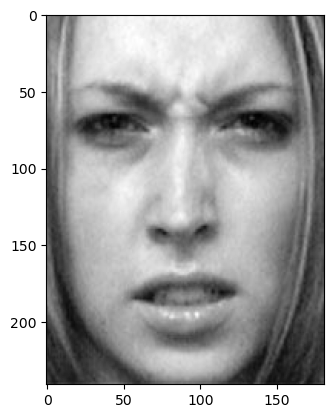

In [11]:
for SVD in lista_SVD:
    i = 0 # Cambiar si se quiere mostrar otra imagen
    imagen = SVD[i].reshape((241, 181))
    plt.imshow(imagen, cmap="gray")
    plt.show()

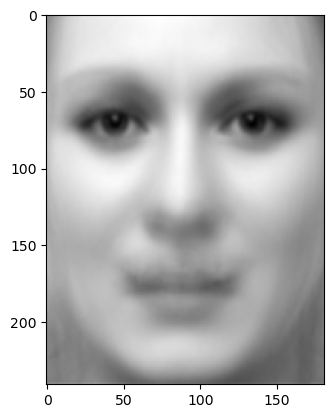

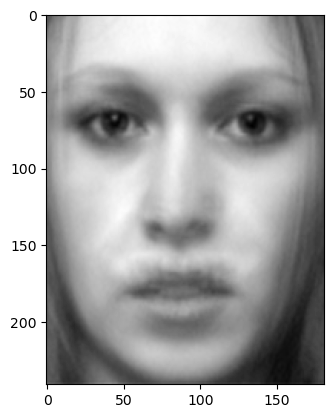

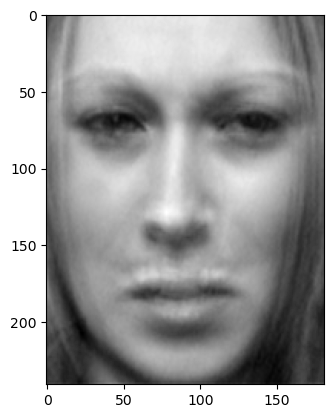

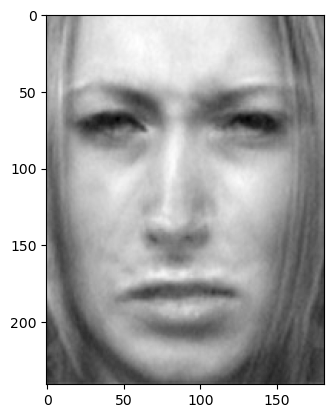

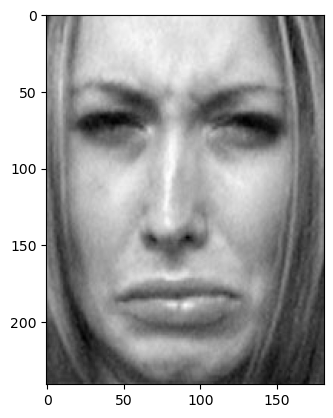

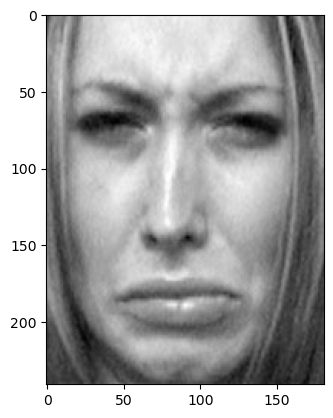

In [12]:
for SVD in lista_SVD:
    i = 1 # Cambiar si se quiere mostrar otra imagen
    imagen = SVD[i].reshape((241, 181))
    plt.imshow(imagen, cmap="gray")
    plt.show()

### 1.2

Realice PCA a la matriz A (es decir, el paso anterior pero centrando los datos previamente), y ´usela para proyectar las imagenes sobre el espacio af´ın
de dimensi´on k que mejor las aproxima. Use valores de k = 1, 5, 10, 25, 50
y 72. Nuevamente, para cada k, muestre un par de “rostros aproximados”
y comp´arelos con los originales. Recuerde descentrar las im´agenes una vez
proyectadas

### 1.3
Muestre una tabla donde se compare el error cuadr´atico medio de las aproximaciones encontradas en los items anteriores (es decir, para los valores
de k mencionados, y tanto para el caso centrado como el no centrado).
Recuerde que este error esta dado por la f´ormula

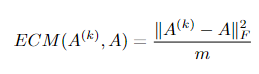

donde A(k) contiene las proyecciones de las imagenes como filas, y m es la
cantidad de im´agenes. Comente.

### 1.4
Visualize los datos como puntos, proyect ́andolos en sus dos primeras com-
ponentes principales. Coloree los rostros correspondientes a una misma
persona de un mismo color, y use colores distintos para rostros de perso-
nas distintas. Para mayor claridad, muestre los datos correspondientes a
las dos primeras personas

### 1.5

Repita el paso anterior, proyectando ahora sobre la tercera y cuarta com-
ponentes principales, y luego sobre la quinta y sexta. Comente. En parti-
cular, responda: ¿qu ́e par de componentes (1 y 2 vs 3 y 4 vs 5 y 6) parece
ser m ́as relevante para separar a las 2 primeras personas? ¿C ́omo explica
esto?

### 1.6

La matriz test.npy contiene seis im ́agenes, tres de ellas correspondientes
a rostros y tres de ellas correspondientes a otros objetos cotidianos. Vi-
sualice las seis im ́agenes. Luego, aprox ́ımelas proyectandolas sobre las 20 primeras componentes principales (de la misma matriz A anterior con los
72 rostros), y visualice esta aproximaci ́on. Comente sobre la calidad de
las aproximaciones obtenidas. ¿Que imagenes se aproximan bien sobre las
componentes principales de A? ¿Porqu ́e?

### 1.7

Basado en el punto anterior, proponga un m ́etodo que permita distinguir
si una foto corresponde a un rostro o no (s ́olo se pide describirlo, no es
necesario que lo implemente). Fundamente su propuesta

## Parte 2

El objetivo de esta pregunta es obtener una visualizaci ́on sobre las posi-
ciones pol ́ıticas de los distintos miembros de la c ́amara de diputados de Chile.
En el archivo votes.csv se encuentra la informaci ́on sobre los votos de cada
diputado/a en el a ̃no 2022 sobre las distintas propuestas de leyes revisadas. Es-
tos votos toman el valor 1 (apruebo), 0 (abstengo) y −1 (rechazo). Adem ́as, se
da informaci ́on sobre el partido pol ́ıtico de cada persona (columna party).

### 2.1

Realice una exploraci ́on de los datos. En particular notar ́a que hay varios
valores Nan. ¿C ́omo los interpretar ́ıa

### 2.2

Hay varios m ́etodos que se pueden usar para lidiar con datos faltantes.
Para el caso de este problema, algunas alternativas son:

    i) Eliminar las filas o columnas que contengan alg ́un elemento nulo.

    ii) Reemplazarlo por el valor del voto promedio en esa votaci ́on, entre todos los diputados que no presenten valores nulos.

    iii) Reemplazarlo por el valor del voto promedio en esa votaci ́on, entre

los diputados de la misma bancada que no tengan valores nulos.
La primera opci ́on no es viable en nuestro caso, ya que en casi todas las
filas y columnas de nuestros datos se encuentra alg ́un valor nulo, por lo
que enfrentar ́ıamos una reducci ́on muy dr ́astica en la cantidad de datos.

#### 2.2.a

Reemplace los valores nulos, usando la segunda opci ́on. Proyecte los
datos (centrandolos previamente) sobre el subespacio de dimensi ́on
2 que mejor los aproxime. Plotee los datos sobre este subespacio,
coloreando cada punto de acuerdo a su partido pol ́ıtico.

#### 2.2.b

Ahora, reemplace los valores nulos usando la tercera opci ́on. Proyecte
estos datos sobre el subespacio de dimensi ́on 2 que mejor los aproxi-
me. Plotee los datos sobre este subespacio, coloreando cada punto de
acuerdo a su partido pol ́ıtico.

#### 2.2.c

Comente sobre los resultados obtenidos en ambos casos. En particu-
lar, ¿observa una divisi ́on entre los pol ́ıticos de partidos de derecha
con los partidos de izquierda? ¿Que protocolo de reemplazo de valores
nulos parece m ́as razonable?
3